In [71]:
from transformers import AutoTokenizer, AutoModel
import torch

import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [72]:
# Load pre-trained model tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [73]:
# functions
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    # Using mean of last layer hidden states as the sentence embedding
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

def calculate_centroid(embeddings):
    return np.mean(embeddings, axis=0)

In [74]:
# input
# Pre-classified sentences
concrete_sentences = ["The cat sat on the mat.", "The dog barked loudly.", "She baked a cake.", "John speaks well"]
abstract_sentences = ["Freedom is the right to choose.", "Love is eternal.", "Happiness is a state of mind.", "Freedom of speech is required"]

In [75]:
# Getting embeddings
concrete_embeddings = [get_embedding(sentence) for sentence in concrete_sentences]
abstract_embeddings = [get_embedding(sentence) for sentence in abstract_sentences]

In [76]:
print(type(concrete_embeddings))
print(type(concrete_embeddings[0]))
print(concrete_embeddings[0].shape)

<class 'list'>
<class 'numpy.ndarray'>
(1, 768)


In [77]:
# Calculating average locations (centroids)
concrete_centroid = calculate_centroid(concrete_embeddings)
abstract_centroid = calculate_centroid(abstract_embeddings)

In [78]:
print(type(concrete_centroid))
print(concrete_centroid.shape)

<class 'numpy.ndarray'>
(1, 768)


In [79]:
# Classifying a new sentence
new_sentence = "John works every day."
new_embedding = get_embedding(new_sentence)

In [80]:
print(type(new_embedding))
print(new_embedding.shape)

<class 'numpy.ndarray'>
(1, 768)


In [81]:
# Measuring distances to the centroids
distance_to_concrete = np.linalg.norm(new_embedding - concrete_centroid)
distance_to_abstract = np.linalg.norm(new_embedding - abstract_centroid)

In [82]:
print(distance_to_concrete)
print(distance_to_abstract)

6.462117
7.5629873


In [83]:
# Classification based on proximity
if distance_to_concrete < distance_to_abstract:
    classification = "Concrete"
else:
    classification = "Abstract"

In [84]:
# print classification
print(classification)

Concrete


In [85]:
# Concatenate all embeddings
all_embeddings = np.concatenate((concrete_embeddings, abstract_embeddings), axis=0)

In [86]:
print(type(all_embeddings))
print(all_embeddings.shape)

<class 'numpy.ndarray'>
(8, 1, 768)


In [87]:
all_embeddings = np.squeeze(all_embeddings, axis=1)

In [88]:
print(type(all_embeddings))
print(all_embeddings.shape)

<class 'numpy.ndarray'>
(8, 768)


In [89]:
# Set perplexity to a value less than the number of samples
perplexity_value = min(30, len(all_embeddings) - 1)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
embeddings_2d = tsne.fit_transform(all_embeddings)

In [90]:
# Number of concrete and abstract sentences
num_concrete = len(concrete_embeddings)

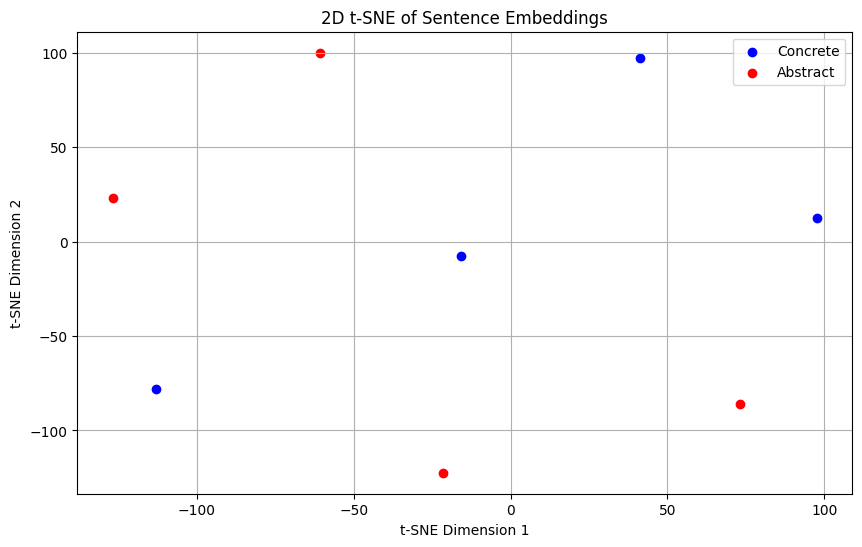

In [91]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot concrete embeddings
plt.scatter(embeddings_2d[:num_concrete, 0], embeddings_2d[:num_concrete, 1], color='b', label='Concrete')

# Plot abstract embeddings
plt.scatter(embeddings_2d[num_concrete:, 0], embeddings_2d[num_concrete:, 1], color='r', label='Abstract')

plt.title('2D t-SNE of Sentence Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()